In [1]:
using PairwiseListMatrices
using Benchmarks
using Base.Test
using Gadfly

In [2]:
const SAMPLES = collect(5:50:2000)
const TIME = zeros(Float64, length(SAMPLES)*2)
const NAMES = vcat([ ["pairwiselistmatrix", "full"] for i in 1:length(SAMPLES) ]...)
const XS = vcat([ [x, x] for x in SAMPLES ]...);

## MEAN

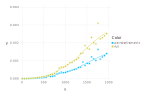

In [3]:
k = 0
for sample in SAMPLES
    list = PairwiseListMatrix(rand(div(sample*(sample-1),2)))
    mat = full(list)
    @test_approx_eq mean(list) mean(mat)
    k += 1
    TIME[k] = @elapsed mean(list)
    k += 1
    TIME[k] = @elapsed mean(mat)
end

plot(x=XS, y=TIME, color=NAMES, Geom.point, Geom.smooth)

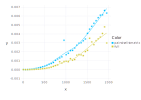

In [4]:
k = 0
for sample in SAMPLES
    list = PairwiseListMatrix(rand(div(sample*(sample-1),2)))
    mat = full(list)
    @test_approx_eq mean(list, 1) mean(mat, 1)
    k += 1
    TIME[k] = @elapsed mean(list, 1)
    k += 1
    TIME[k] = @elapsed mean(mat, 1)
end

plot(x=XS, y=TIME, color=NAMES, Geom.point, Geom.smooth)

## SUM

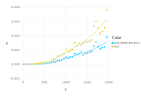

In [5]:
k = 0
for sample in SAMPLES
    list = PairwiseListMatrix(rand(div(sample*(sample-1),2)))
    mat = full(list)
    @test_approx_eq sum(list) sum(mat)
    k += 1
    TIME[k] = @elapsed sum(list)
    k += 1
    TIME[k] = @elapsed sum(mat)
end

plot(x=XS, y=TIME, color=NAMES, Geom.point, Geom.smooth)

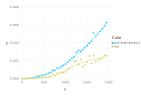

In [6]:
k = 0
for sample in SAMPLES
    list = PairwiseListMatrix(rand(div(sample*(sample-1),2)))
    mat = full(list)
    @test_approx_eq sum(list, 1) sum(mat, 1)
    k += 1
    TIME[k] = @elapsed sum(list, 1)
    k += 1
    TIME[k] = @elapsed sum(mat, 1)
end

plot(x=XS, y=TIME, color=NAMES, Geom.point, Geom.smooth)

# Mean without diagonal: mean_nodiag

In [7]:
import PairwiseListMatrices: mean_nodiag

mean_nodiag(m::Matrix, region) = (squeeze(sum(m, region), region) .- diag(m)) ./ (size(m, region)-1)

function mean_nodiag{T}(m::Matrix{T})
    nrow, ncol = size(m)
    total = zero(T)
    for i in 1:(ncol-1)
      for j in (i+1):ncol
        total += m[i, j]
      end
    end
    total / div(ncol*(ncol-1), 2)
end

mean_nodiag (generic function with 4 methods)

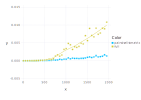

In [8]:
k = 0
for sample in SAMPLES
    list = PairwiseListMatrix(rand(div(sample*(sample-1),2)))
    mat = full(list)
    @test_approx_eq mean_nodiag(list) mean_nodiag(mat)
    k += 1
    TIME[k] = @elapsed mean_nodiag(list)
    k += 1
    TIME[k] = @elapsed mean_nodiag(mat)
end

plot(x=XS, y=TIME, color=NAMES, Geom.point, Geom.smooth)

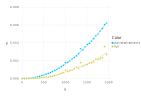

In [9]:
k = 0
for sample in SAMPLES
    list = PairwiseListMatrix(rand(div(sample*(sample-1),2)))
    mat = full(list)
    @test_approx_eq mean_nodiag(list, 1) mean_nodiag(mat, 1)
    k += 1
    TIME[k] = @elapsed mean_nodiag(list, 1)
    k += 1
    TIME[k] = @elapsed mean_nodiag(mat, 1)
end

plot(x=XS, y=TIME, color=NAMES, Geom.point, Geom.smooth)

# Vector{PairwiseListMatrix}

### SUM

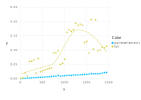

In [10]:
k = 0
for sample in SAMPLES
    list = PairwiseListMatrix{Float64,Any,false}[ PairwiseListMatrix(rand(div(150*(150-1),2))) for i in 1:sample ]
    mat = Matrix{Float64}[ full(l) for l in list ]  
    @test_approx_eq sum(list) sum(mat)
    k += 1
    TIME[k] = @elapsed sum(list)
    k += 1
    TIME[k] = @elapsed sum(mat)
end

plot(x=XS, y=TIME, color=NAMES, Geom.point, Geom.smooth)

### MEAN

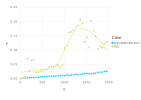

In [11]:
k = 0
for sample in SAMPLES
    list = PairwiseListMatrix{Float64,Any,false}[ PairwiseListMatrix(rand(div(150*(150-1),2))) for i in 1:sample ]
    mat = Matrix{Float64}[ full(l) for l in list ]  
    @test_approx_eq mean(list) mean(mat)
    k += 1
    TIME[k] = @elapsed mean(list)
    k += 1
    TIME[k] = @elapsed mean(mat)
end

plot(x=XS, y=TIME, color=NAMES, Geom.point, Geom.smooth)